<a href="https://colab.research.google.com/github/pradeep004/Sentimental-Analysis-on-the-Amazon-Fine-Food-Using-deep-learning/blob/main/Amazon_Food_Review_Using_the_deep_learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Reviews.csv')
data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


Checking Null data

In [ ]:
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

Dropping Null data

In [ ]:
data=data.dropna()
data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

*** Data Cleaning ***


Replacing Score greater than 3 with 2, score equal to 3 with 1 and score lesser tahn 3 with 0.
signifies 0 as NEGATIVE REVIEW  1 as NEUTRAL REVIEW  2 as POSTIVE REVIEW

In [ ]:

reviews=[]
for i in data['Score']:
    if i <3:                              
        reviews.append(0)
    if i==3:
        reviews.append(1)
    if i>3:
        reviews.append(2)
len(reviews),len(data)

(568411, 568411)

In [ ]:
data['sentiment']=reviews
final_dataset=data[['Text','sentiment']]
final_dataset.head()               

,Text,sentiment
0,I have bought several of the Vitality canned d...,2
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,2
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,2


Keeping Positive and Negative data

In [ ]:
positive_data=final_dataset[data['sentiment']==2]
negative_data=final_dataset[data['sentiment']==0]

In [ ]:
import numpy as np
data_p=positive_data.iloc[np.random.randint(1,443766,5000),:]
data_n=negative_data.iloc[np.random.randint(1,82007,5000),:]
len(data_n),len(data_p)

(5000, 5000)

In [ ]:
data=pd.concat([data_p,data_n])
len(data)

10000

Converting sentiments to 0 and 1

In [ ]:
c=[]
for i in data['sentiment']:
    if i<2:
        c.append(0)
    if i==2:
        c.append(1)
data['sentiment']=c 

Handling HTML tags

In [ ]:
from bs4 import BeautifulSoup
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
data['review']=data['Text'].apply(strip_html)
data.head(2)

,Text,sentiment,review
437503,Got these for my sister who has Celiac disease...,1,Got these for my sister who has Celiac disease...
241216,"Just tried this today(was a ""freebie"" while wa...",1,"Just tried this today(was a ""freebie"" while wa..."


Handling Punctuation 

In [ ]:
data=data.drop('Text',axis=1)
import nltk 
def punc_clean(text):
    import string as st
    a=[w for w in text if w not in st.punctuation]
    return ''.join(a)
data['review']=data['review'].apply(punc_clean)
data.head(2)

,sentiment,review
437503,1,Got these for my sister who has Celiac disease...
241216,1,Just tried this todaywas a freebie while waiti...


Removing Stopwords

In [ ]:
def remove_stopword(text):
    stopword=nltk.corpus.stopwords.words('english')
    stopword.remove('not')
    a=[w for w in nltk.word_tokenize(text) if w not in stopword]
    return ' '.join(a)
data['review']=data['review'].apply(remove_stopword)

*** Splitting Data into train and test ***

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['review'],data['sentiment'],  test_size=0.30, random_state=0)

*** Vectorizing data ***

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vectr=TfidfVectorizer(ngram_range=(1,2),min_df=5)
train_vector = vectr.fit_transform(X_train)
test_vector = vectr.transform(X_test)

In [ ]:
vectr_c=CountVectorizer(ngram_range=(1,2),min_df=5)
train_vector_c = vectr_c.fit_transform(X_train)
test_vecto_c = vectr_c.transform(X_test)

*** Parameter Selection ***

In [ ]:
distance = []
for i in range(-2, 3):
    mul = 10 ** (-i + 1)
    center = 10 ** i
    for j in range(-5,6):
        distance.append(j/mul + center)
print(distance)
iteration = []
for i in range (75, 130, 5):
    iteration.append(i)
print(iteration)
parameter = {'C' : distance, 'max_iter' : iteration}
print(parameter)

[0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.01, 0.011, 0.012, 0.013000000000000001, 0.014, 0.015, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09000000000000001, 0.1, 0.11, 0.12000000000000001, 0.13, 0.14, 0.15000000000000002, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 110.0, 120.0, 130.0, 140.0, 150.0]
[75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125]
{'C': [0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.01, 0.011, 0.012, 0.013000000000000001, 0.014, 0.015, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09000000000000001, 0.1, 0.11, 0.12000000000000001, 0.13, 0.14, 0.15000000000000002, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 110.0, 120.0, 130.0, 140.0, 150.0], 'max_iter': [75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125]}


# Model Building using Logistic Regression + Randomized Search CV  with CountVectorizer features

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
random_model = RandomizedSearchCV(LogisticRegression(class_weight='balanced', penalty='l2'), parameter, cv = 10, scoring = 'accuracy', n_jobs=-1)
random_model.fit(train_vector_c, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions=...
                                              0.012, 0.013000000000000001,
                                              0.014, 0.015, 0.05,
                                              0.060000000000000005, 0.07, 0.08,
            

*** Accuracy ***

In [ ]:
#print(random_model.best_estimator_)
pred = random_model.predict(test_vecto_c)
from sklearn.metrics import accuracy_score
acc_log = accuracy_score(y_test, pred)

In [ ]:
random_model.predict(vectr.transform(['i like this food']))

array([1])

*** Classification Report ***

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1489
           1       0.88      0.88      0.88      1511

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



*** Confusion Matrix ***

[[1303  186]
 [ 179 1332]]


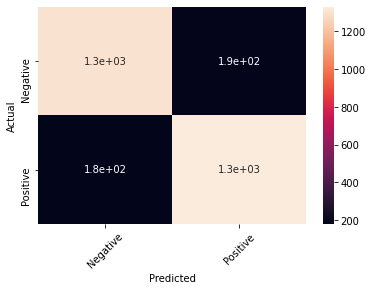

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion = confusion_matrix(y_test , pred)
print(confusion)
df_cm = pd.DataFrame(confusion , index = ['Negative','Positive'])
sns.heatmap(df_cm ,annot = True)
plt.xticks([0.5,1.5],['Negative','Positive'],rotation = 45)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Model Building Using Random Forest Classifier with tfid features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## initialize your Model
clf = RandomForestClassifier(random_state=0) 
clf.fit(train_vector, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Predict on Test data
preds = clf.predict(test_vector)
# Calculate Model Accuracy
acc_randf = accuracy_score(preds, y_test)



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1489
           1       0.88      0.85      0.86      1511

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



[[1307  182]
 [ 229 1282]]


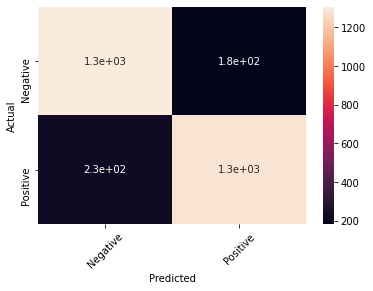

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion = confusion_matrix(y_test , preds)
print(confusion)
df_cm = pd.DataFrame(confusion , index = ['Negative','Positive'])
sns.heatmap(df_cm ,annot = True)
plt.xticks([0.5,1.5],['Negative','Positive'],rotation = 45)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Model Using Embeddings

In [ ]:

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

In [ ]:
top_words = 6000
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(data['review'])
list_tokenized_train = tokenizer.texts_to_sequences(data['review'])

max_review_length = 130
X_train = pad_sequences(list_tokenized_train, maxlen=max_review_length)
y_train = data['sentiment']


In [ ]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(Dropout(0.75))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 130, 32)           192032    
_________________________________________________________________
dropout_1 (Dropout)          (None, 130, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4160)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4161      
Total params: 196,193
Trainable params: 196,193
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train, epochs=3, batch_size=64, validation_split=0.2)

Epoch 1/3
125/125 [==============================] - 2s 11ms/step - loss: 0.6585 - accuracy: 0.6196 - val_loss: 0.9101 - val_accuracy: 0.0300
Epoch 2/3
125/125 [==============================] - 1s 9ms/step - loss: 0.6134 - accuracy: 0.6679 - val_loss: 0.8460 - val_accuracy: 0.2430
Epoch 3/3
125/125 [==============================] - 1s 9ms/step - loss: 0.4709 - accuracy: 0.8055 - val_loss: 0.6419 - val_accuracy: 0.6105


In [ ]:
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix
list_tokenized_test = tokenizer.texts_to_sequences(data['review'])
X_test = pad_sequences(list_tokenized_test, maxlen=max_review_length)
y_test = data['sentiment']
prediction = model.predict(X_test)
y_pred = (prediction > 0.5)
acc_emb = accuracy_score(y_pred, y_test)
#print('F1-score: ', f1_score(y_pred, y_test))

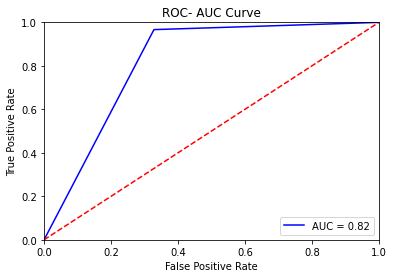

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC- AUC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model Using Embedding + LSTM

In [ ]:
embedding_vecor_length = 32
model_1 = Sequential()
model_1.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model_1.add(LSTM(100))
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 130, 32)           192032    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 245,333
Trainable params: 245,333
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.fit(X_train,y_train, epochs=3, batch_size=64, validation_split=0.2)

Epoch 1/3
125/125 [==============================] - 22s 158ms/step - loss: 0.5124 - accuracy: 0.7331 - val_loss: 0.5917 - val_accuracy: 0.7610
Epoch 2/3
125/125 [==============================] - 18s 148ms/step - loss: 0.2583 - accuracy: 0.8994 - val_loss: 0.3486 - val_accuracy: 0.8535
Epoch 3/3
125/125 [==============================] - 18s 148ms/step - loss: 0.1705 - accuracy: 0.9399 - val_loss: 0.4778 - val_accuracy: 0.8320


In [ ]:
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix
list_tokenized_test = tokenizer.texts_to_sequences(data['review'])
X_test = pad_sequences(list_tokenized_test, maxlen=max_review_length)
y_test = data['sentiment']
prediction = model_1.predict(X_test)
y_pred = (prediction > 0.5)
acc_emb_lstm = accuracy_score(y_pred, y_test)
#print('F1-score: ', f1_score(y_pred, y_test))

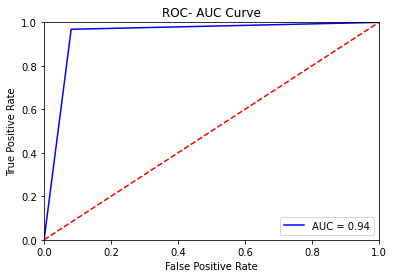

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC- AUC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Comaprison of Models

In [ ]:
#Getting accuracy and log loss for each model
model_data = pd.DataFrame({'Models' : ['LogR', 'RandF', 'Embedding', 'LSTM'],
                        'Accuracy %' : [acc_log,acc_randf,acc_emb,acc_emb_lstm]})

In [ ]:
model_data['Accuracy %'] = model_data['Accuracy %'].apply(lambda x : round((x*100),2))

In [ ]:
model_data

,Models,Accuracy %
0,LogR,87.83
1,RandF,86.30
2,Embedding,81.92
3,LSTM,94.36


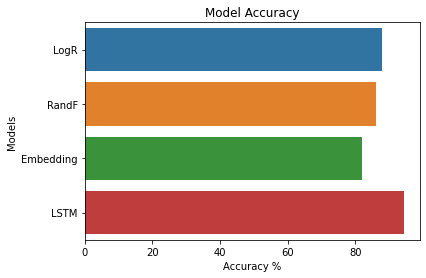

In [ ]:
#Visualizing the accuracy and log loss of each model
sns.barplot(data = model_data, x = model_data['Accuracy %'], y = model_data.Models)
plt.title('Model Accuracy')
plt.show()



Out of the above used models, Model built using LSMT has accuried the best accuracy of around 94%.